# **Social Network Analysis | Datmin II Week 7**

**Nama : Joshua Giovanni Mulyanto**
**NIM: 164231046**

## Python Package

In [ ]:
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import pipeline
from sklearn.metrics import silhouette_score
from operator import itemgetter
from textblob import TextBlob

## Crawl twitter

In [ ]:
# Twitter auth token
twitter_auth_token = '' # buka inspect > application > cookies > folder x.com

In [5]:
# Crawl tweet
filename = 'charlie_kirk.csv'
search_keyword = 'charlie kirk until:2025-09-26 since:2025-09-10 lang:en' # topiknya (ngasal dulu)
limit = 2000

!npx -y tweet-harvest@latest -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/charlie_kirk.csv, renaming to ./tweets-data/charlie_kirk.old.csv

Filling in keywords: charlie kirk until:2025-09-26 since:2025-09-10 lang:en


-- Scrolling... (1)

Your tweets saved to: c:\Documents\Tugas Kuliah\SMT 5\DATA_MINING2\Week7\tweets-data\charlie_kirk.csv
Total tweets saved: 20

-- Scrolling... (1)

Your tweets saved to: c:\Documents\Tugas Kuliah\SMT 5\DATA_MINING2\Week7\tweets-data\charlie_kirk.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: c:\Documents\Tugas Kuliah\SMT 5\DATA_MINING2\Week7\tweets-data\charlie_kirk.csv
Total tweets saved

npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@51f9d0e14ded7cdb2a1f7f898c61920d"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@3ed1cef80b65fd0fce6a81e4188d9fbc"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@07df49f481752e6a928

In [ ]:
# Merubah data dalam file menjadi sebuah dataframe
file_path = f"tweets-data/{'charlie_kirk.csv'}"
df = pd.read_csv(file_path, delimiter=",")
# Menampilkan dataframe
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1970960581730459883,Thu Sep 25 23:59:58 +0000 2025,0,@nypost No mention of Charlie Kirk. Elitist sc...,1971364085922193684,NaN,nypost,en,NaN,0,0,0,https://x.com/undefined/status/197136408592219...,1519556943907463170,NaN
1,1971364084915503325,Thu Sep 25 23:59:58 +0000 2025,0,WRONG @JDVance @VP AMERICA BACK THEN DIDN'T HA...,1971364084915503325,NaN,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197136408491550...,996585149344108545,NaN
2,1971251997165945259,Thu Sep 25 23:59:57 +0000 2025,1,@alexbronzini We created a million Charlie Kirk s,1971364080347906223,NaN,alexbronzini,en,NaN,0,0,0,https://x.com/undefined/status/197136408034790...,1606242156750028803,NaN
3,1971364066569617736,Thu Sep 25 23:59:54 +0000 2025,10,coworker wouldnt shut up ab charlie kirk so i ...,1971364066569617736,NaN,NaN,en,NaN,0,1,1,https://x.com/undefined/status/197136406656961...,1506582150824538116,NaN
4,1970699907183861853,Thu Sep 25 23:59:50 +0000 2025,1,@lmrescue21 @usanewshq You are right Charlie Kirk,1971364049280696557,NaN,lmrescue21,en,NaN,0,0,0,https://x.com/undefined/status/197136404928069...,1963766408724037632,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1971347172189929634,Thu Sep 25 22:52:46 +0000 2025,3,Charlie Kirk's True Legacy: Raising a Generati...,1971347172189929634,NaN,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197134717218992...,2231961361,NaN
1999,1971347164455633328,Thu Sep 25 22:52:44 +0000 2025,0,ABSOLUTELY WHY THE WORLD NEEDED JESUS CHRIST A...,1971347164455633328,https://pbs.twimg.com/media/G1uhzKCWUAAln3z.jpg,NaN,en,NaN,0,0,0,https://x.com/undefined/status/197134716445563...,1857506203582214144,NaN
2000,1971339193218637839,Thu Sep 25 22:52:39 +0000 2025,0,@ShaykhSulaiman The generation we are is very ...,1971347143299563640,NaN,ShaykhSulaiman,en,NaN,0,1,0,https://x.com/undefined/status/197134714329956...,1782758820424335360,NaN
2001,1971340184017838533,Thu Sep 25 22:52:35 +0000 2025,2,@_wake_up_USA civil war is now innocents peopl...,1971347128036491706,NaN,_wake_up_USA,en,NaN,0,1,1,https://x.com/undefined/status/197134712803649...,1056662850410692608,NaN


## Preprocessing

### Cleaning text (regex)

In [ ]:
def clean_text(text):
  text = text.lower()  # Lowercase
  text = re.sub(r'@[^\s]+', '', text)  # Menghapus mentions
  text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
  text = re.sub(r'\d+', '', text)  # Menghapus angka
  return text
# Mengaplikasikan fungsi yang telah dibuat pada teks
df['full_text_cleaned'] = df['full_text'].apply(clean_text)
# Menggabungkan seluruh entri kolom menjadi satu teks
combined_text = ' '.join(df['full_text_cleaned'].tolist())
combined_text

' no mention of charlie kirk elitist scumbags wrong   america back then didnt have compromised  that were controlled by israel charlie kirk repeatedly stated before he was assassinated israel rules us gov  defundisrael stopgazagenocide freepalestinefromzionists     we created a million charlie kirk s coworker wouldnt shut up ab charlie kirk so i told him he was being a pain in my neck   you are right charlie kirk     would you agree that the government of a country is not necessarily equivalent to it s citizens there is a reason jews were planning protests against bibi prior to the hamas attacks even charlie kirk openly questioned the israeli government but said he loved the jewish people  right and charlie kirk wife called hik and asked him to show up charlie kirks story written in  ukraine welcomes new guestspoles httpstcooygtjfn charlie kirk s death keeps having the most profound impact on the world     shooting charlie kirk wasn t violet rhetoric   why does charlie s right arm flin

### Tokenize

In [95]:
# Melakukan tokenisasi pada teks
tokens = word_tokenize(combined_text) 
print(tokens) # Menampilkan token

['no', 'mention', 'of', 'charlie', 'kirk', 'elitist', 'scumbags', 'wrong', 'america', 'back', 'then', 'didnt', 'have', 'compromised', 'that', 'were', 'controlled', 'by', 'israel', 'charlie', 'kirk', 'repeatedly', 'stated', 'before', 'he', 'was', 'assassinated', 'israel', 'rules', 'us', 'gov', 'defundisrael', 'stopgazagenocide', 'freepalestinefromzionists', 'we', 'created', 'a', 'million', 'charlie', 'kirk', 's', 'coworker', 'wouldnt', 'shut', 'up', 'ab', 'charlie', 'kirk', 'so', 'i', 'told', 'him', 'he', 'was', 'being', 'a', 'pain', 'in', 'my', 'neck', 'you', 'are', 'right', 'charlie', 'kirk', 'would', 'you', 'agree', 'that', 'the', 'government', 'of', 'a', 'country', 'is', 'not', 'necessarily', 'equivalent', 'to', 'it', 's', 'citizens', 'there', 'is', 'a', 'reason', 'jews', 'were', 'planning', 'protests', 'against', 'bibi', 'prior', 'to', 'the', 'hamas', 'attacks', 'even', 'charlie', 'kirk', 'openly', 'questioned', 'the', 'israeli', 'government', 'but', 'said', 'he', 'loved', 'the', '

### Stemming

In [96]:
# Melakukan lematisasi pada teks
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
# Menampilkan hasil lematisasi
print("Lemmatized Tokens:", lemmatized_tokens)

Lemmatized Tokens: ['no', 'mention', 'of', 'charlie', 'kirk', 'elitist', 'scumbags', 'wrong', 'america', 'back', 'then', 'didnt', 'have', 'compromised', 'that', 'were', 'controlled', 'by', 'israel', 'charlie', 'kirk', 'repeatedly', 'stated', 'before', 'he', 'wa', 'assassinated', 'israel', 'rule', 'u', 'gov', 'defundisrael', 'stopgazagenocide', 'freepalestinefromzionists', 'we', 'created', 'a', 'million', 'charlie', 'kirk', 's', 'coworker', 'wouldnt', 'shut', 'up', 'ab', 'charlie', 'kirk', 'so', 'i', 'told', 'him', 'he', 'wa', 'being', 'a', 'pain', 'in', 'my', 'neck', 'you', 'are', 'right', 'charlie', 'kirk', 'would', 'you', 'agree', 'that', 'the', 'government', 'of', 'a', 'country', 'is', 'not', 'necessarily', 'equivalent', 'to', 'it', 's', 'citizen', 'there', 'is', 'a', 'reason', 'jew', 'were', 'planning', 'protest', 'against', 'bibi', 'prior', 'to', 'the', 'hamas', 'attack', 'even', 'charlie', 'kirk', 'openly', 'questioned', 'the', 'israeli', 'government', 'but', 'said', 'he', 'loved

### Stopwords

In [ ]:
# Mengoreksi kata-kata dengan ejaan salah
correction_dict = {
    'peopl': 'people',
    'wa': 'was',
    'thi': 'this',
    'ha': 'has'
}
corrected_tokens = [correction_dict.get(token, token) for token in lemmatized_tokens]

In [ ]:
# Menghilangkan stopwords bahasa inggris
stop_words = set(stopwords.words('english'))
final_tokens = [x for x in corrected_tokens if x.isalpha() and x not in stop_words]
print(final_tokens)

['mention', 'charlie', 'kirk', 'elitist', 'scumbags', 'wrong', 'america', 'back', 'didnt', 'compromised', 'controlled', 'israel', 'charlie', 'kirk', 'repeatedly', 'stated', 'assassinated', 'israel', 'rule', 'u', 'gov', 'defundisrael', 'stopgazagenocide', 'freepalestinefromzionists', 'created', 'million', 'charlie', 'kirk', 'coworker', 'wouldnt', 'shut', 'ab', 'charlie', 'kirk', 'told', 'pain', 'neck', 'right', 'charlie', 'kirk', 'would', 'agree', 'government', 'country', 'necessarily', 'equivalent', 'citizen', 'reason', 'jew', 'planning', 'protest', 'bibi', 'prior', 'hamas', 'attack', 'even', 'charlie', 'kirk', 'openly', 'questioned', 'israeli', 'government', 'said', 'loved', 'jewish', 'people', 'right', 'charlie', 'kirk', 'wife', 'called', 'hik', 'asked', 'show', 'charlie', 'kirk', 'story', 'written', 'ukraine', 'welcome', 'new', 'guestspoles', 'httpstcooygtjfn', 'charlie', 'kirk', 'death', 'keep', 'profound', 'impact', 'world', 'shooting', 'charlie', 'kirk', 'violet', 'rhetoric', 'do

In [ ]:
# Menghilangkan kata kunci agar tidak menutupi data
custom_stop_words = {'charlie', 'kirk', 'charli'}
filtered_tokens = [token for token in final_tokens if token not in custom_stop_words]
print(f"Filtered tokens: {filtered_tokens}")

Filtered tokens: ['mention', 'elitist', 'scumbags', 'wrong', 'america', 'back', 'didnt', 'compromised', 'controlled', 'israel', 'repeatedly', 'stated', 'assassinated', 'israel', 'rule', 'u', 'gov', 'defundisrael', 'stopgazagenocide', 'freepalestinefromzionists', 'created', 'million', 'coworker', 'wouldnt', 'shut', 'ab', 'told', 'pain', 'neck', 'right', 'would', 'agree', 'government', 'country', 'necessarily', 'equivalent', 'citizen', 'reason', 'jew', 'planning', 'protest', 'bibi', 'prior', 'hamas', 'attack', 'even', 'openly', 'questioned', 'israeli', 'government', 'said', 'loved', 'jewish', 'people', 'right', 'wife', 'called', 'hik', 'asked', 'show', 'story', 'written', 'ukraine', 'welcome', 'new', 'guestspoles', 'httpstcooygtjfn', 'death', 'keep', 'profound', 'impact', 'world', 'shooting', 'violet', 'rhetoric', 'doe', 'right', 'arm', 'flinch', 'detonation', 'like', 'electric', 'current', 'running', 'device', 'detonates', 'something', 'look', 'maybe', 'add', 'could', 'killed', 'arm', '

## FreqDist

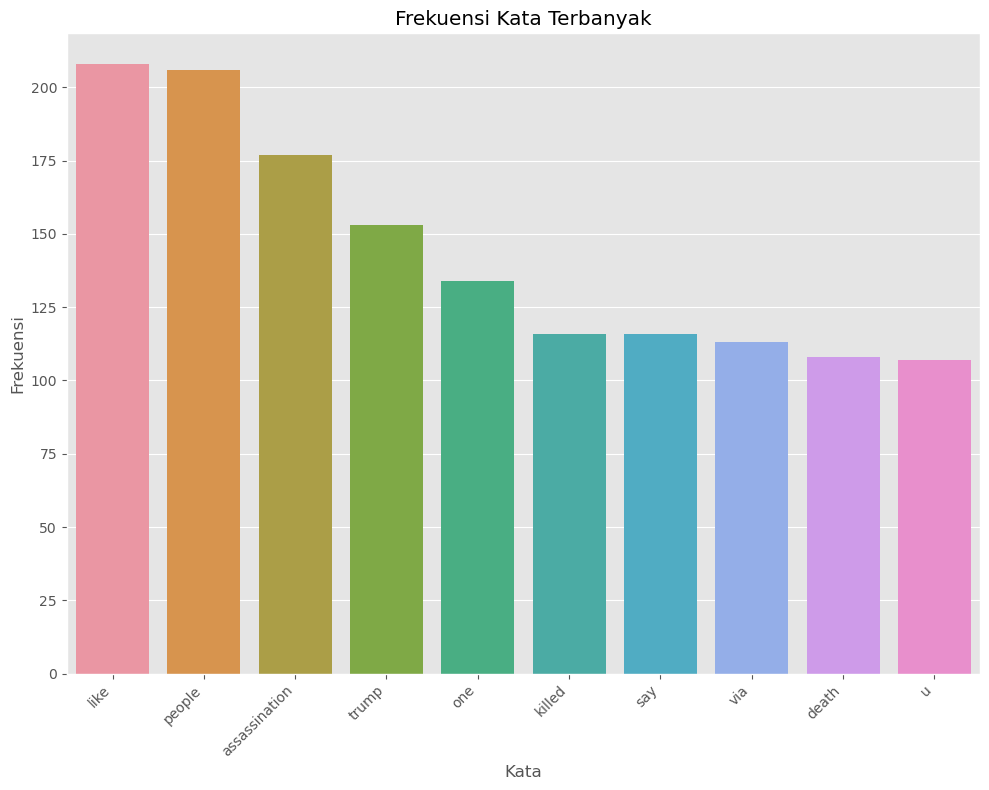

In [ ]:
# Menghitung frekuensi kata
fdist = FreqDist(filtered_tokens)
# Mengambil 10 kata terbanyak
most_common_words = fdist.most_common(10)
# Membuat dataframe dari list tuple
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
# Memvisualisasikan barplot frekuensi kata
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=df_word_freq)
plt.title('Frekuensi Kata Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()


## Wordcloud

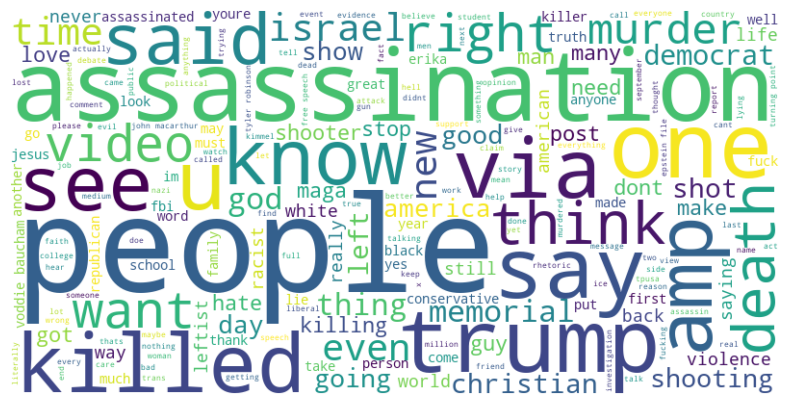

In [ ]:
# Menggabungkan token menjadi teks
text = " ".join(filtered_tokens)
# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Clustering

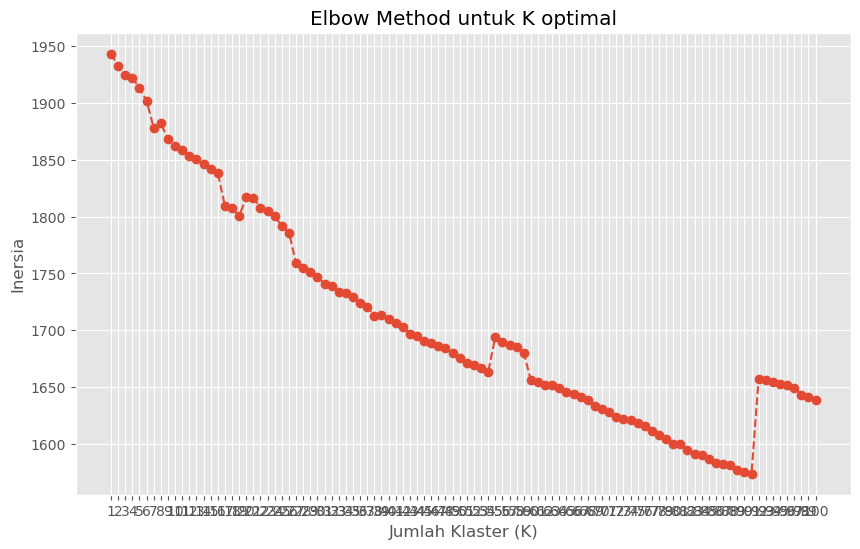

In [107]:
# Mengambil kolom teks saja
documents = df['full_text_cleaned'].dropna().tolist()
# Merubah token menjadi numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)
inertias = [] # Membuat list kosong untuk inersia
k_range = range(1, 101) # mencoba dari 1 klaster hingga 100 klaster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
# Memvisualisasikan Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title('Elbow Method untuk K optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inersia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

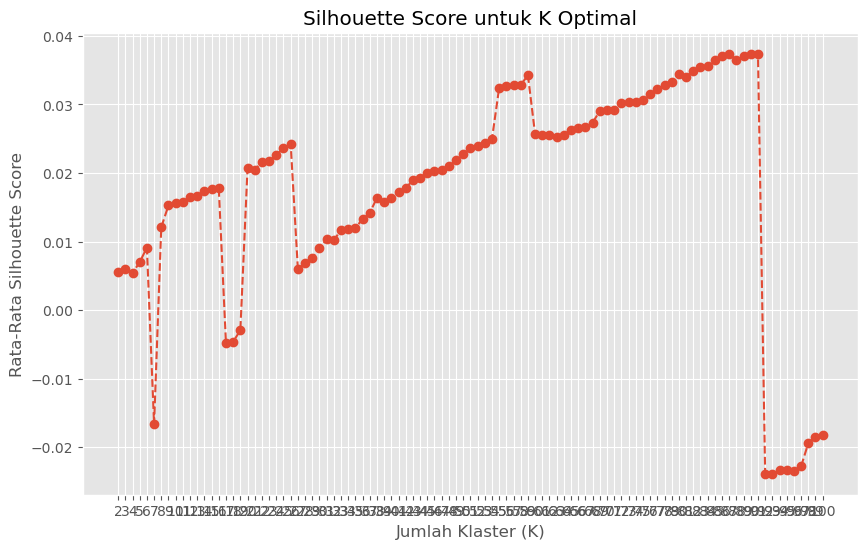

In [109]:
silhouette_scores = [] # Membuat list kosong untuk hasil silhouette score
k_range = range(2, 101) 
# Mencoba dari 2 klaster hingga 100 klaster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
# Memvisualisasikan plot hasil silhouette score
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score untuk K Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Rata-Rata Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Sentiment Analysis

In [ ]:
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    # Memperoleh polarity score
    polarity = blob.sentiment.polarity
    # Mengkategorikan sentimen menggunakan polarity score yang telah diperoleh
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
# Mengaplikasikan fungsi pada dataframe
df['sentiment'] = df['full_text_cleaned'].apply(lambda x: get_textblob_sentiment(x) if x else 'Neutral')

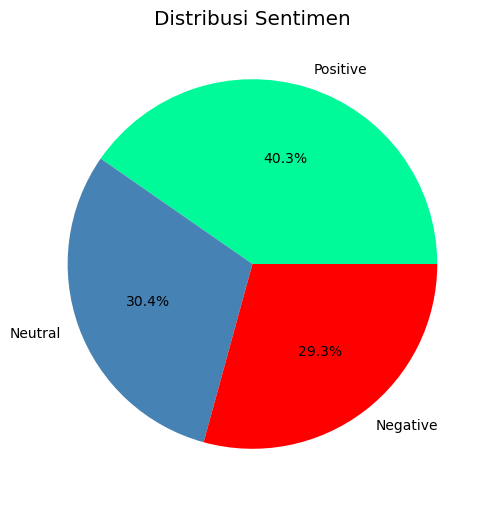

In [116]:
# Menghitung sentimen
sentiment_counts = df['sentiment'].value_counts()
# Menentukan warna tiap kategori sentimen
color_map = {
    'Positive': 'mediumspringgreen',
    'Negative': 'red',
    'Neutral': 'steelblue'
}
# Mencocokkan warna dengan label
ordered_colors = [color_map[label] for label in sentiment_counts.index]
# Membuat Piechart sentiment
plt.figure(figsize=(8, 6))
plt.pie(x=sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',colors=ordered_colors)
plt.title('Distribusi Sentimen')
plt.show()

## Social Network Analysis

In [ ]:
# Inisialisasi graf berarah
G_mention = nx.DiGraph()
# Lakukan perulangan untuk setiap baris di DataFrame
for r in df.iterrows():
    # Mengambil entri pada kolom 'user_id_str' sebagai pengguna
    author = r[1]['user_id_str'] 
    # Mengambil tweet pengguna pada kolom 'full_text'
    text = r[1]['full_text']
    try:
        # Ubah format kolom 'created_at' menjadi datetime
        timestamp = pd.to_datetime(r[1]['created_at'])
    except:
        # Jika parsing timestamp gagal, lewati baris ini
        continue
    # Gunakan regular expression untuk mengekstrak mention
    mentions = set(re.findall(r"@(\w+)", text))
    # Tambahkan pengguna jika ada yang di-mention di dalam teks
    if len(mentions) > 0:
        for u in mentions:
            u = f'@{u}'
            G_mention.add_edge(author, u, Timestamp=timestamp)

In [ ]:
# Menghitung Centrality measures
graph_centrality = nx.degree_centrality(G_mention)
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(G_mention)
max_clo = max(graph_closeness.items(), key=itemgetter(1))
graph_betweenness = nx.betweenness_centrality(G_mention, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))
# Menampilkan Centrality measures
print("centrality measures:", graph_centrality)
print("closeness centrality:", graph_closeness)
print("betweenness centrality:", graph_betweenness)
print("max degree:", max_de)
print("max closeness:", max_clo)
print("max betweenness:", max_bet)


centrality measures: {1519556943907463170: 0.00039323633503735744, '@nypost': 0.0015729453401494297, 996585149344108545: 0.0023594180102241447, '@JDVance': 0.003539127015336217, '@GOP': 0.001966181675186787, '@VP': 0.003932363350373574, '@POTUS': 0.003932363350373574, '@SenateGOP': 0.0015729453401494297, '@HouseGOP': 0.0007864726700747149, 1606242156750028803: 0.00039323633503735744, '@alexbronzini': 0.0007864726700747149, 1963766408724037632: 0.0007864726700747149, '@lmrescue21': 0.00039323633503735744, '@usanewshq': 0.00039323633503735744, 1518693508063936513: 0.0015729453401494297, '@RCortesBanegas': 0.00039323633503735744, '@stillgray': 0.00039323633503735744, '@TheDemocrats': 0.0015729453401494297, 1569122070105055233: 0.00039323633503735744, '@nancy_ricc90780': 0.00039323633503735744, 1473813801845899268: 0.0011797090051120724, '@USMCLiberal': 0.001966181675186787, '@SCDawgin': 0.00039323633503735744, 1812271173792907264: 0.00039323633503735744, '@RyanMattaMedia': 0.0011797090051

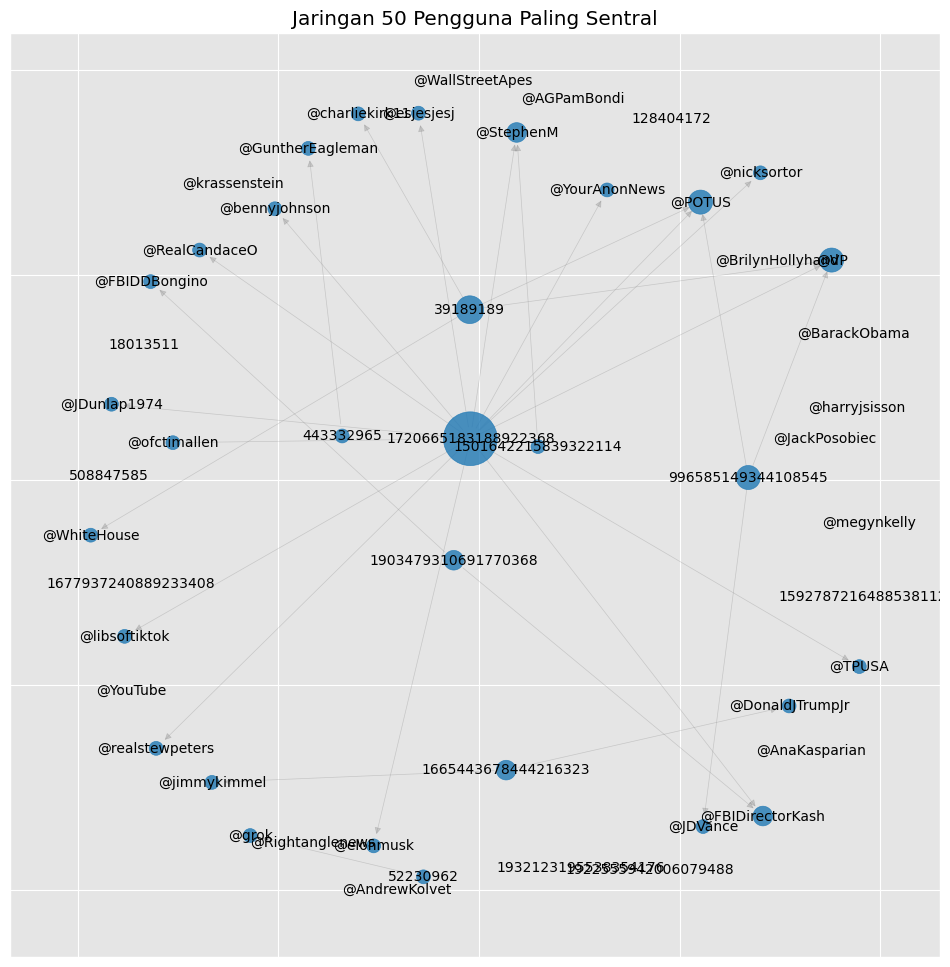

In [118]:
degree_centrality = nx.degree_centrality(G_mention)
# 2. Get the top 50 nodes with the highest degree
top_nodes = sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)[:50]
top_node_names = [node for node, centrality in top_nodes]
# 3. Create a subgraph containing only these top nodes
G_sub = G_mention.subgraph(top_node_names)
# 4. Set up the plot
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(12, 12))
pos = nx.spring_layout(G_sub, k=0.6) # Increase k for more spread
# 5. Create a list of node sizes based on their degree in the subgraph
node_sizes = [G_sub.degree(n) * 100 for n in G_sub.nodes()]
# 6. Draw the cleaner graph
# Nodes
nx.draw_networkx_nodes(G_sub, pos, node_size=node_sizes, alpha=0.8)
# Edges
nx.draw_networkx_edges(G_sub, pos, width=0.5, alpha=0.3, edge_color='gray')
# Labels (only for the subgraph nodes)
nx.draw_networkx_labels(G_sub, pos, font_size=10)
plt.title("Jaringan 50 Pengguna Paling Sentral")
plt.show()

In [119]:
# Analisis node (pengguna) yang paling sentral dalam jaringan
degree_centrality = nx.degree_centrality(G_mention)
betweenness_centrality = nx.betweenness_centrality(G_mention)
closeness_centrality = nx.closeness_centrality(G_mention)
# Mencari 5 pengguna dengan degree centrality tertinggi 
top_degree_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
# Mencari 5 pengguna dengan betweenness centrality tertinggi 
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
# Mencari 5 pengguna dengan closeness centrality tertinggi 
top_closeness_nodes = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
# Mengidentifikasi pengguna yang kemungkinan menjadi pemulai diskusi (pengguna dengan tweet awal/terdahulu)
df['created_at'] = pd.to_datetime(df['created_at'])
earliest_tweets = df.nsmallest(5, 'created_at')
discussion_starters = set(earliest_tweets['user_id_str'])
print("Top 5 pengguna berdasarkan degree centrality:")
for node, centrality in top_degree_nodes:
    print(f"{node}: {centrality}")
print("\nTop 5 pengguna berdasarkan betweenness centrality:")
for node, centrality in top_betweenness_nodes:
    print(f"{node}: {centrality}")
print("\nTop 5 pengguna berdasarkan closeness centrality:")
for node, centrality in top_closeness_nodes:
    print(f"{node}: {centrality}")
print("\nPotensi pemulai diskusi:")
for user in discussion_starters:
    print(user)

Top 5 pengguna berdasarkan degree centrality:
1720665183188922368: 0.057805741250491545
@YouTube: 0.031458906802988594
52230962: 0.019661816751867872
@FBIDirectorKash: 0.014942980731419583
@FBIDDBongino: 0.014156508061344868

Top 5 pengguna berdasarkan betweenness centrality:
1519556943907463170: 0.0
@nypost: 0.0
996585149344108545: 0.0
@JDVance: 0.0
@GOP: 0.0

Top 5 pengguna berdasarkan closeness centrality:
@YouTube: 0.031458906802988594
@FBIDirectorKash: 0.014942980731419583
@FBIDDBongino: 0.014156508061344868
@TPUSA: 0.009437672040896579
@libsoftiktok: 0.008651199370821865

Potensi pemulai diskusi:
1056662850410692608
508847585
1857506203582214144
1782758820424335360
2231961361


###**Degree centrality**
mengukur seberapa banyak koneksi langsung yang dimiliki oleh seorang pengguna

Pengguna dengan degree centrality tinggi cenderung menjadi pusat percakapan atau distribusi informasi dalam jaringan. Mereka lebih mungkin terlibat dalam berbagai percakapan.

Top 5 pengguna dengan degree centrality tertinggi:
- @cagubnyinyir2 (0.0463) memiliki koneksi langsung terbanyak dalam jaringan.
- @kaesangp dan @bonapasogit24 (0.0417) juga termasuk yang paling terhubung.
- Pengguna lain seperti @AntonMariesie dan @erinagudono juga sangat aktif dengan banyak koneksi langsung.



###**Betweenness centrality**
mengukur seberapa sering seorang pengguna menjadi penghubung atau perantara antara node lain dalam jaringan.

- @cagubnyinyir2 memiliki betweenness centrality tertinggi, meskipun nilainya kecil (0.0001), ini menunjukkan bahwa ia mungkin berperan dalam menghubungkan subkelompok di jaringan.

- Pengguna lainnya, seperti @geldocdulu, @kaesangp, @howtodresvvell, dan @AntonMariesie, memiliki betweenness centrality 0, yang berarti mereka tidak memainkan peran penghubung yang signifikan antara node-node lain dalam jaringan.

### **Closeness centrality**
mengukur seberapa dekat seorang pengguna dengan semua pengguna lain di jaringan, berdasarkan jarak terpendek. Pengguna dengan closeness centrality yang tinggi dapat menjangkau node-node lain lebih cepat.

- @kaesangp memiliki closeness centrality tertinggi karena dia sering dimention posisinya sangat strategis dalam hal seberapa cepat dia bisa menjangkau seluruh jaringan.
- Pengguna seperti @erinagudono, @WinnerCogan, @Muslim_AntiPKI9, dan @denismalhotra juga memiliki posisi yang relatif dekat dengan pengguna lain di jaringan.

### **Potensial discussion starter:**
- karatepay
- cagubnyinyir2
- GunRomli
- Dollybutar

### **Kesimpulan pengguna yang terlibat:**
- @cagubnyinyir2 tampaknya sangat berpengaruh, memiliki banyak koneksi (degree centrality), dan juga memainkan peran penting dalam menghubungkan node-node yang berbeda (betweenness centrality).
- @kaesangp juga merupakan pengguna yang penting karena selain banyak koneksi, ia berada di posisi yang strategis untuk menjangkau seluruh jaringan dengan cepat (closeness centrality tertinggi).
- Pengguna lain seperti @AntonMariesie dan @erinagudono juga memiliki pengaruh yang cukup besar

In [ ]:
df



---

link colab : https://colab.research.google.com/drive/1eTWAOx-uvzIp1BKUSfPww9zgE4OaiYMs?usp=sharing